# Shopify Summer 2022 Data Science Intern Challenge
## Question 1

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis.

<br> a. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 
<br> b. What metric would you report for this dataset?
<br> c. What is its value?

### Definition of AOV
Referred from Shopify Blog (https://www.shopify.com/blog/average-order-value#averageorder): "If your store has a total revenue of \\$2,000 split between 100 orders, your average order value is \$20\. This means that, on average, a customer spends \\$20 for each purchase from your store." So AOV is defined as **total revenue of orders** divided by **number of orders** (each order can contain multiple items).

### Answer 1(a) 
* The mean value of order_amount is $3145.13. So in the problem statement, we try to calculate the average order value (AOV) naively just by using average value of "order_amount" for total 5000 records. Given that those shops selling sneakers which are normally affordable, this metric seems not be able to reasonably provide an overview of customer's purchase behavior.
* The problem could be there exist several high dollar orders (outliers) that skew up the average order value.

&ensp; To better evaluate the data:
* Calculating AOV for each shop as we have 100 different shops (need to be be careful with total_items, this is the number of items contained in one order, not the number of orders).
* Consider detecting possible fraud/unusual activities and removing these outliers.
* Consider using other metrics like median or mode instead of mean.

### Answer 1(b)
We have two choices:
* If we want to keep all order records, instead, we can use the middle value of all orders (median) or the most frequently occurring order value (mode), which seems to be more representative of customer's purchase behavior of sneakers.
* If we want to using the average value of all orders (AOV), then we may want to remove these outliers and use average AOV per shop.

### Answer 1(c)
* If requiring keeping all order records without removing outliers, instead of using AOV naively, I would report using **median** value of AOV per shop which is **\\$308.89** or **mode** value of AOV per shop which is around **\\$254**.
* If choosing to remove outliers, then I would report **mean** value of AOV per shop which is **\\$299.68**. This means that on average, a customer spends around \\$300 for each purchase from these sneaker shops.


**The following sections shows my detailed work and summary of data analytics result.**

-----

### Coding Part of Descriptive Statistics

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Import dataset and print first 10 rows of dataset
df = pd.read_excel("2019 Winter Data Science Intern Challenge Data Set.xlsx")
df.head(10)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1.0,53.0,746.0,224.0,2.0,cash,2017-03-13 12:36:56.190
1,2.0,92.0,925.0,90.0,1.0,cash,2017-03-03 17:38:51.999
2,3.0,44.0,861.0,144.0,1.0,cash,2017-03-14 04:23:55.595
3,4.0,18.0,935.0,156.0,1.0,credit_card,2017-03-26 12:43:36.649
4,5.0,18.0,883.0,156.0,1.0,credit_card,2017-03-01 04:35:10.773
5,6.0,58.0,882.0,138.0,1.0,credit_card,2017-03-14 15:25:00.986
6,7.0,87.0,915.0,149.0,1.0,cash,2017-03-01 21:37:57.465
7,8.0,22.0,761.0,292.0,2.0,cash,2017-03-08 02:05:37.981
8,9.0,64.0,914.0,266.0,2.0,debit,2017-03-17 20:56:50.468
9,10.0,52.0,788.0,146.0,1.0,credit_card,2017-03-30 21:08:26.343


In [3]:
# Print number of rows and columns
print("Number of rows:",df.shape[0])
print("Number of columns:",df.shape[1])

Number of rows: 5000
Number of columns: 7


In [4]:
# Print each column name
print(df.columns)

Index(['order_id', 'shop_id', 'user_id', 'order_amount', 'total_items',
       'payment_method', 'created_at'],
      dtype='object')


In [5]:
# Check type of each column
df.dtypes

order_id                 float64
shop_id                  float64
user_id                  float64
order_amount             float64
total_items              float64
payment_method            object
created_at        datetime64[ns]
dtype: object

In [6]:
# Check whether exist missing values
df.isnull().sum()

order_id          0
shop_id           0
user_id           0
order_amount      0
total_items       0
payment_method    0
created_at        0
dtype: int64

In [7]:
# Check whether exist duplicated rows
df.duplicated().sum()

0

In [25]:
# Descriptive statistics for order_amount and total_items 
pd.options.display.float_format = "{:.2f}".format
df[["order_amount", "total_items"]].describe()

,order_amount,total_items
count,5000.00,5000.00
mean,3145.13,8.79
std,41282.54,116.32
min,90.00,1.00
25%,163.00,1.00
50%,284.00,2.00
75%,390.00,3.00
max,704000.00,2000.00


### Summary of Descriptive Statistics
* The dataset contains 5000 order records of 100 sneaker shops (each sells one model of sneaker) over a 30-day window.
* The dataset doesn't contain any duplicated rows or missing value.
* The mean value of order_amount is \\$3145.13. The minimum value of order_amount is \$90 while the maximum value is \\$704000, so there are definitely a few high dollar orders that skew up the average.
* Each order purchased contains multiple items. The average number of items within in one order is around 9. The minimum numer of items within in one order is 1 and maximum is 2000.

### Coding Part of Calculating AOV per Shop 

In [9]:
# Group dataset by shop_id and calculate AOV per shop
order_amount_by_shopid = df.groupby(["shop_id"])["order_amount"].agg('sum')
order_frequency_by_shopid = df["shop_id"].value_counts()
total_items_by_shopid = df.groupby(["shop_id"])["total_items"].agg('sum')
df_shopid = pd.concat([order_amount_by_shopid, order_frequency_by_shopid, total_items_by_shopid], axis = 1)
df_shopid.columns = ["order_amount", "order_frequency", "total_items"]
df_shopid.index.name= "shop_id"

In [10]:
# Print first 10 rows of df_shopid
df_shopid.head(10)

,order_amount,order_frequency,total_items
shop_id,,,
1.0,13588.0,44,86.0
2.0,9588.0,55,102.0
3.0,14652.0,48,99.0
4.0,13184.0,51,103.0
5.0,13064.0,45,92.0
6.0,22627.0,59,121.0
7.0,12208.0,56,109.0
8.0,11088.0,46,84.0
9.0,13806.0,59,117.0


**As each sneaker shop only sells one model of sneaker, we can calculate sneaker price for each shop using $\cfrac{\text{order_amount}}{\text{total_items}}$.**

In [11]:
# Add a column calculating price of the sneaker model offered by each shop
df_shopid["price_per_sneaker"] = df_shopid["order_amount"]/df_shopid["total_items"]

In [12]:
# Add a column calculating AOV per shop
df_shopid["AOV"] = df_shopid["order_amount"]/df_shopid["order_frequency"]
df_shopid.reset_index(level=0, inplace=True)
# Show first 10 rows of df_shopid
df_shopid.head(10)

,shop_id,order_amount,order_frequency,total_items,price_per_sneaker,AOV
0,1.0,13588.0,44,86.0,158.0,308.818182
1,2.0,9588.0,55,102.0,94.0,174.327273
2,3.0,14652.0,48,99.0,148.0,305.250000
3,4.0,13184.0,51,103.0,128.0,258.509804
4,5.0,13064.0,45,92.0,142.0,290.311111
5,6.0,22627.0,59,121.0,187.0,383.508475
6,7.0,12208.0,56,109.0,112.0,218.000000
7,8.0,11088.0,46,84.0,132.0,241.043478
8,9.0,13806.0,59,117.0,118.0,234.000000
9,10.0,17612.0,53,119.0,148.0,332.301887


In [13]:
# Descriptive statistics for df_shopid
pd.options.display.float_format = "{:.2f}".format
df_shopid.describe()

,shop_id,order_amount,order_frequency,total_items,price_per_sneaker,AOV
count,100.00,100.00,100.00,100.00,100.00,100.00
mean,50.50,157256.40,50.00,439.36,407.99,3136.83
std,29.01,1216217.94,7.29,3396.37,2557.46,23935.88
min,1.00,6840.00,35.00,67.00,90.00,162.86
25%,25.75,12930.50,44.75,88.00,132.75,263.68
50%,50.50,14887.50,50.00,100.00,153.00,308.89
75%,75.25,17600.00,55.00,111.25,168.25,336.63
max,100.00,11990176.00,68.00,34063.00,25725.00,235101.49


### Summary of Analytics
* After calculating AOV for each shop, we can see the average AOV among 100 shops is 3136.83. The minimum AOV is 162.86 and maximum AOV is 235101.49. The median AOV is 308.89, which seems more reasonable.
* The standard deviation of AOV among 100 shops is 23935.88, which is pretty huge. And the 75th percentile is 336.63 which is actually close to the median value. **So there exist outliers that skew up the average AOV**.
* Total Number of orders per shop over a 30-day windows range from 35 to 68.
* Checking price per sneaker model, the maximum value is 25725, which seems like an unusual pricing for a pair of sneaker. And this also confirms that there exist very large value orders that skew up the average order value (AOV).
* We may want to check the shop which selling sneaker at price 25725 and the shop which has largest order_amount 11990176.

### Coding Part of Detecting Outliers and Unusual Activity

In [14]:
# Locate the shop_id that sells sneaker at $25725
idx = df_shopid["price_per_sneaker"].argmax()
df_shopid.iloc[idx]

shop_id                  78.00
order_amount        2263800.00
order_frequency          46.00
total_items              88.00
price_per_sneaker     25725.00
AOV                   49213.04
Name: 77, dtype: float64

**So the shop_id is 78 that sells sneaker at $25725.**

In [15]:
# Locate record of shop_id = 78
df_shopid_78 = df_shopid[df_shopid["shop_id"] == 78]
df_shopid_78

,shop_id,order_amount,order_frequency,total_items,price_per_sneaker,AOV
77,78.00,2263800.00,46,88.00,25725.00,49213.04


In [31]:
# Check payment_methods of orders from shop_id 78
df[df["shop_id"]==78].value_counts("payment_method")

payment_method
cash           18
debit          18
credit_card    10
dtype: int64

**There are 10 orders of shop_id 78 were paid by credit_card.**

In [16]:
# Locate shop_id that has largest order_amount
idx = df_shopid["order_amount"].argmax()
df_shopid.iloc[idx]

shop_id                   42.00
order_amount        11990176.00
order_frequency           51.00
total_items            34063.00
price_per_sneaker        352.00
AOV                   235101.49
Name: 41, dtype: float64

**So the shop_id is 42 that has largest order_amount.**

In [17]:
# Locate record of shop_id = 78
df_shopid_42 = df_shopid[df_shopid["shop_id"] == 42]
df_shopid_42

,shop_id,order_amount,order_frequency,total_items,price_per_sneaker,AOV
41,42.00,11990176.00,51,34063.00,352.00,235101.49


In [18]:
# Locate order record that has maximum total_items within one order
idx = df["total_items"].argmax()
df.iloc[idx]

order_id                        16.00
shop_id                         42.00
user_id                        607.00
order_amount                704000.00
total_items                   2000.00
payment_method            credit_card
created_at        2017-03-07 04:00:00
Name: 15, dtype: object

**And the shop_id 42 has an order that contains 2000 items purchased by user_id 607 !!**

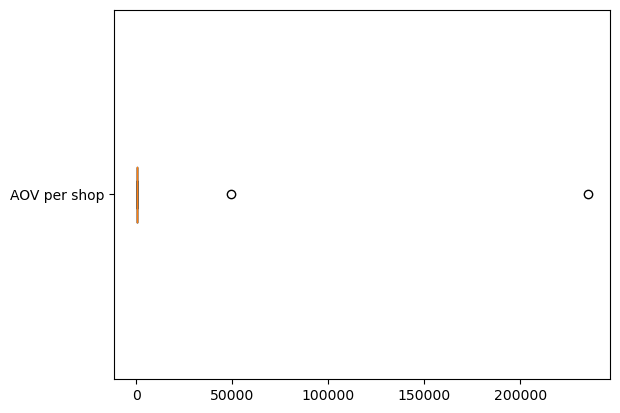

In [19]:
# Visualize 100 shops' AOV using boxplot
plotdata = df_shopid["AOV"]
plt.boxplot(plotdata, vert = False, labels=["AOV per shop"])
plt.show()

### Summary of Outliers/Unusual Records
* Clearly from the visualization, there are two outliers (pretty extreme values): shop 78 and shop 42 that has extreme high AOV that we need to keep an eye on.
* For the shop_id 78, over a 30-day window, it has 46 order records with \\$2263800 order_amount. And total_items within these orders are 88, which means in average around 2 items per order. Also, there are 10 orders out of 46 orders were paid by credit_card. So there might exists unusual transactions(credit card fraud) or maybe this shop sells limited edition luxury sneaker model.
* For the shop_id 42, over a 30-day window, it has 51 order records with \\$11990176 order_amount. And total_items within these orders are 34063, which means there exists some orders that each of them contains a very large number of items. But when we look at the price of its sneaker, pricing at \$352 is a little bit high but acceptable if it sells high-end sneaker model.

### Coding Part of Metrics Median and Mode

In [20]:
# Look at df_shopid again
df_shopid.head()

,shop_id,order_amount,order_frequency,total_items,price_per_sneaker,AOV
0,1.00,13588.00,44,86.00,158.00,308.82
1,2.00,9588.00,55,102.00,94.00,174.33
2,3.00,14652.00,48,99.00,148.00,305.25
3,4.00,13184.00,51,103.00,128.00,258.51
4,5.00,13064.00,45,92.00,142.00,290.31


In [21]:
# Find values of mean, median and mode of AOV
print("the mean value of AOV per shop:", df_shopid["AOV"].mean())
print("the median value of AOV per shop:", df_shopid["AOV"].median())
print("the mode value of AOV per shop:", df_shopid["AOV"].astype(int).mode()[0])

the mean value of AOV per shop: 3136.834087887025
the median value of AOV per shop: 308.8897584973166
the mode value of AOV per shop: 254


In [22]:
# If removing the outliers: shop_id 42 and shop_id 78
df_shopid_new = df_shopid.drop([41,77])
df_shopid_new.describe()

,shop_id,order_amount,order_frequency,total_items,price_per_sneaker,AOV
count,98.00,98.00,98.00,98.00,98.00,98.00
mean,50.31,15016.98,50.03,99.85,150.22,299.68
std,29.16,3469.43,7.35,16.37,23.92,50.90
min,1.00,6840.00,35.00,67.00,90.00,162.86
25%,25.25,12803.50,44.25,88.00,132.25,262.66
50%,50.50,14763.00,50.00,100.00,153.00,308.83
75%,74.75,17478.00,55.00,111.00,165.75,334.63
max,100.00,23128.00,68.00,136.00,201.00,403.55


**The standard deviation of AOV is only 50.90 now.**

In [23]:
# Find values of mean AOV, median AOV and mode AOV
print("the mean value of AOV per shop:", df_shopid_new["AOV"].mean())
print("the median value of AOV per shop:", df_shopid_new["AOV"].median())
print("the mode value of AOV per shop:", df_shopid_new["AOV"].astype(int).mode()[0])

the mean value of AOV per shop: 299.68239912615485
the median value of AOV per shop: 308.8276955602537
the mode value of AOV per shop: 254


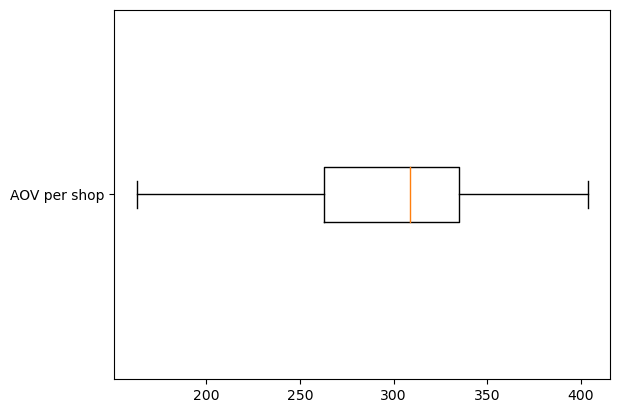

In [24]:
# Visualize 98 shops' AOV using boxplot
plotdata = df_shopid_new["AOV"]
plt.boxplot(plotdata, vert = False, labels=["AOV per shop"])
plt.show()

## Question 2
For this question you’ll need to use SQL. Follow this link to access the data set required for the challenge. Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.

<br> a.How many orders were shipped by Speedy Express in total?
<br>b.What is the last name of the employee with the most orders?
<br>c.What product was ordered the most by customers in Germany?

### Answer 2(a)

There are **54** orders were shipped by Speedy Express in total.
``` mysql
SELECT COUNT(DISTINCT orderID) FROM Orders o
JOIN Shippers s
ON o.Shipperid = s.Shipperid
WHERE ShipperName = "Speedy Express"
```

### Answer 2(b)
The last name of the employee with the most orders is **Peacock**

```mysql
SELECT LastName 
FROM Orders o JOIN Employees e ON o.EmployeeID = e.EmployeeID
GROUP BY o.EmployeeID
ORDER BY COUNT(*) DESC
LIMIT 1
```

### Answer 2(c)

The product is **Boston Crab Meat** with total order quantity 160.

```mysql
SELECT p.ProductName, SUM(Quantity) AS TotalQuantity
FROM Customers c, Orders o, OrderDetails od, Products p
WHERE c.Country = "Germany" 
AND c.CustomerID = o.CustomerID
AND od.OrderID = o.OrderID 
AND od.ProductID = p.ProductID 
GROUP BY p.ProductID
ORDER BY TotalQuantity DESC
LIMIT 1;
```